In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/Stuart_GSE128639/Stuart_bm_v2.h5ad')
print('Original adata:', adata.shape)
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')
# del adata


Original adata: (30011, 17009)
all cell types: ['CD14_Mono', 'CD16_Mono', 'CD4_Memory', 'CD4_Naive', 'CD56_bright_NK', 'CD8_Effector_1', 'CD8_Effector_2', 'CD8_Memory_1', 'CD8_Memory_2', 'CD8_Naive', 'GMP', 'HSC', 'LMPP', 'MAIT', 'Memory_B', 'NK', 'Naive_B', 'Plasmablast', 'Prog_B_1', 'Prog_B_2', 'Prog_DC', 'Prog_Mk', 'Prog_RBC', 'Treg', 'cDC2', 'gdT', 'pDC']


In [3]:
adata.obs.head()

,celltype.l1,celltype.l2,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,lane,donor,RNA.weight
a_AAACCTGAGCTTATCG.1,Progenitor_cells,Prog_RBC,7546,2136,1350,25,HumanHTO4,batch1,0.487299
a_AAACCTGAGGTGGGTT.1,T_cell,gdT,1029,437,2970,25,HumanHTO1,batch1,0.245543
a_AAACCTGAGTACATGA.1,T_cell,CD4_Naive,1111,429,2474,23,HumanHTO5,batch1,0.501680
a_AAACCTGCAAACCTAC.1,T_cell,CD4_Memory,2741,851,4799,25,HumanHTO3,batch1,0.431308
a_AAACCTGCAAGGTGTG.1,Mono&DC,CD14_Mono,2099,843,5434,25,HumanHTO2,batch1,0.572097


In [4]:
adata.var_names

Index(['FO538757.2', 'AP006222.2', 'RP4-669L17.10', 'RP11-206L10.9',
       'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       ...
       'FAM19A5', 'RP3-522J7.6', 'CITF22-1A6.3', 'MOV10L1', 'MIR99AHG',
       'AP000223.42', 'DSCR9', 'AP001626.2', 'AP001046.5', 'AC004556.1'],
      dtype='object', length=17009)

## Read features

In [5]:
import os
os.chdir('/Users/evanli/Documents/EvanPys/Progress/Stuart_bm/Level2_onlylog1p/feature_selection')

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [6]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
CD14_Mono,19,9
CD16_Mono,23,7
CD4_Memory,112,57
CD4_Naive,95,48
CD56_bright_NK,8,0
CD8_Effector_1,14,3
CD8_Effector_2,24,6
CD8_Memory_1,8,1
CD8_Memory_2,10,2
CD8_Naive,170,75


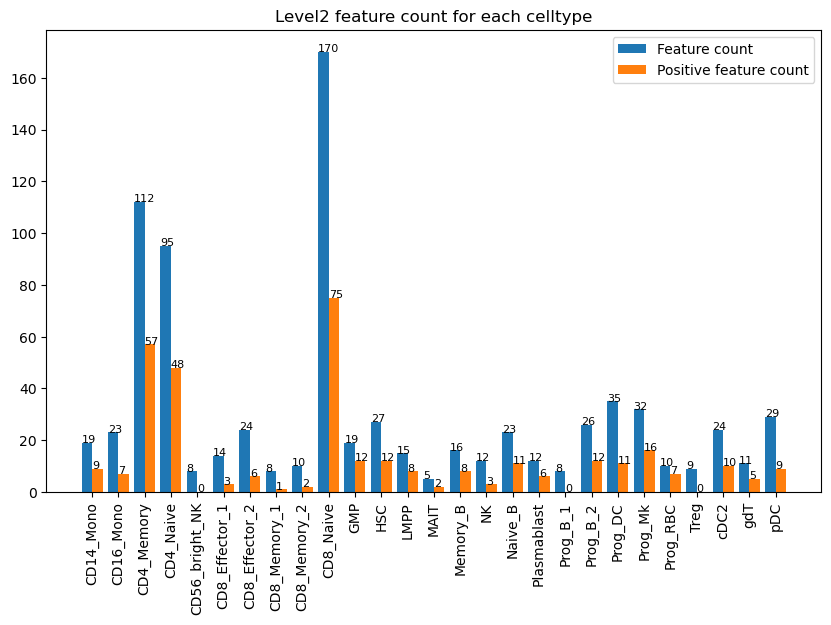

In [9]:
# Sort count_df by 'Feature_count' in descending order
# count_df = count_df.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.4, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Level2 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot cell number

In [6]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\GSE164378\Hao_PBMC_GSE164378.h5ad")
adata.obs['celltype.l1'] = adata.obs['celltype.l1'].str.replace(' ', '_')

In [10]:
counts = adata.obs['celltype.l2'].value_counts()
counts = counts.sort_index()
counts

CD4_Memory        3329
CD4_Naive         4370
CD8_Effector_1     571
CD8_Effector_2     303
CD8_Memory_1       438
CD8_Memory_2       549
CD8_Naive         3835
CD14_Mono         6435
CD16_Mono          427
CD56_bright_NK     125
GMP                739
HSC                258
LMPP               287
MAIT               514
Memory_B          1620
NK                1251
Naive_B           1892
Plasmablast        221
Prog_B_1           142
Prog_B_2           126
Prog_DC            260
Prog_Mk            121
Prog_RBC           745
Treg               291
cDC2               474
gdT                366
pDC                322
Name: celltype.l2, dtype: int64

In [11]:
sum(counts)

30011

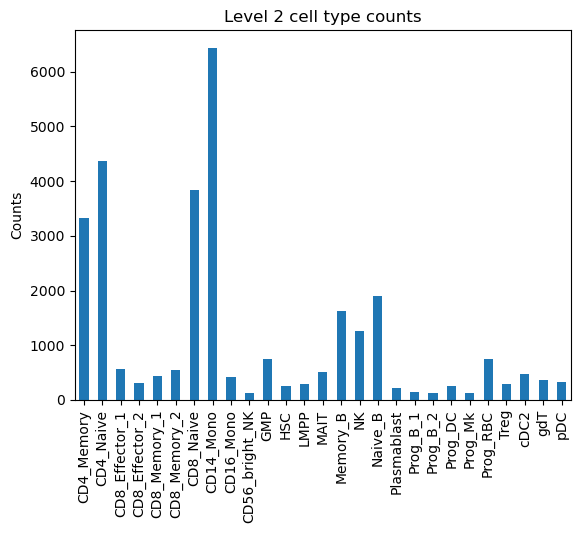

In [12]:
counts.plot(kind='bar')
plt.title('Level 2 cell type counts')
plt.ylabel('Counts')
plt.show()